## DATA IMPORT

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
df = pd.read_csv('address_cleaned.csv')
df

,Entrenamiento,Email,Precios US,Ubicacion,Incluye pasantia,Metodo de pago,Estatus laboral,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Egresado_Activo,Egresado_Egresado,Egresado_Retirado,Primer contacto_Instagram,Primer contacto_WhatsApp,Condiciones de pago_Completo,Condiciones de pago_Cuotas
0,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Distrito Nacional,0,Transferencia,0,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Boca Chica,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Bootcamp en Desarrollo Web,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Luner, miércoles y viernes de 8: pm a 10:00 pm",1.0,0.0,0.0,1.0,0.0,0.0,1.0
156,Bootcamp en Desarrollo Web,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Luner, miércoles y viernes de 8: pm a 10:00 pm",1.0,0.0,0.0,1.0,0.0,0.0,1.0
157,Bootcamp en Data Science y Machine Learning en...,gmail.com,2900.0,Distrito Nacional,1,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Martes, Jueves y Sábados",1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,Bootcamp en Data Science y Machine Learning en...,hotmail.com,2900.0,Distrito Nacional,1,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Martes, Jueves y Sábados",1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [22]:
df["Egresado_Activo"].value_counts()

0.0    142
1.0     18
Name: Egresado_Activo, dtype: int64

Se eliminara la columna de egresados activos porque no existe una correlacion con el la columna objetivo. 

In [23]:
df = df.drop(df.loc[df["Egresado_Activo"] == 1].index)

In [24]:
df["Egresado_Activo"].value_counts()

0.0    142
Name: Egresado_Activo, dtype: int64

In [25]:
df1=df.drop(columns=["Egresado_Activo","Egresado_Retirado"])
df1.head()

,Entrenamiento,Email,Precios US,Ubicacion,Incluye pasantia,Metodo de pago,Estatus laboral,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Egresado_Egresado,Primer contacto_Instagram,Primer contacto_WhatsApp,Condiciones de pago_Completo,Condiciones de pago_Cuotas
0,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,0.0,1.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Distrito Nacional,0,Transferencia,0,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,1.0,0.0,0.0,1.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Boca Chica,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0


In [26]:
df1.shape

(142, 15)

In [27]:
df1.isna().sum()

Entrenamiento                     0
Email                             0
Precios US                        0
Ubicacion                         0
Incluye pasantia                  0
Metodo de pago                    0
Estatus laboral                   0
Razon de eleccion del bootcamp    0
Proveedores de bootcamp           0
Horario de los bootcamps          0
Egresado_Egresado                 0
Primer contacto_Instagram         0
Primer contacto_WhatsApp          0
Condiciones de pago_Completo      0
Condiciones de pago_Cuotas        0
dtype: int64

## TRAIN TEST SPLIT

In [28]:
from sklearn.model_selection import train_test_split

X = df1.drop('Egresado_Egresado', axis=1)
y = df1['Egresado_Egresado']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# Primero, dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Luego, dividimos el conjunto de prueba en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

# Verificar los tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento (X_train):", len(X_train))
print("Tamaño del conjunto de validación (X_val):", len(X_val))
print("Tamaño del conjunto de prueba (X_test):", len(X_test))
print("Tamaño del conjunto de entrenamiento (y_train):", len(y_train))
print("Tamaño del conjunto de validación (y_val):", len(y_val))
print("Tamaño del conjunto de prueba (y_test):", len(y_test))

Tamaño del conjunto de entrenamiento (X_train): 99
Tamaño del conjunto de validación (X_val): 21
Tamaño del conjunto de prueba (X_test): 22
Tamaño del conjunto de entrenamiento (y_train): 99
Tamaño del conjunto de validación (y_val): 21
Tamaño del conjunto de prueba (y_test): 22


In [29]:
X_test.shape

(22, 14)

In [30]:
X_train.shape

(99, 14)

## PREPROCESING

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

In [32]:
#Selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
#Escaladores
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
#Pipe
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)
#Transform
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
#Fit
col_transformer.fit(X_train)
# transform train and test
X_train_processed = col_transformer.transform(X_train)
X_valid_processed = col_transformer.transform(X_val)
X_test_processed = col_transformer.transform(X_test)

max_depth_range = list(range(0, 25 ))
x = 1
r2 = []
for depth in max_depth_range:
    dec_tree = KNeighborsClassifier(n_neighbors=x)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_valid_processed, y_val)
    r2.append(score)
    x = x+1## Modelos

In [33]:
max_depth_range = list(range(0, 15 ))
x = 1
r2 = []
for depth in max_depth_range:
    KnnVal = KNeighborsClassifier(n_neighbors=x)
    KnnVal.fit(X_train_processed, y_train)
    score = .score(X_valid_processed, y_val)
    r2.append(score)
    x = x+1

NameError: name 'dec_tree' is not defined

ValueError: x and y must have same first dimension, but have shapes (15,) and (0,)

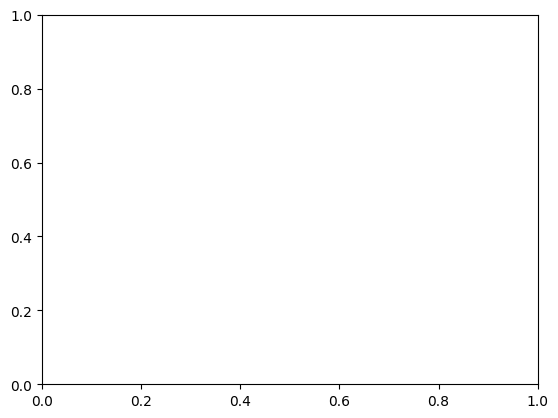

In [18]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_processed, y_train)
knn.score(X_valid_processed, y_val)

0.6666666666666666

In [24]:
y_pred = knn.predict(X_valid_processed)


report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.78      0.82      0.80        17

    accuracy                           0.67        21
   macro avg       0.39      0.41      0.40        21
weighted avg       0.63      0.67      0.65        21



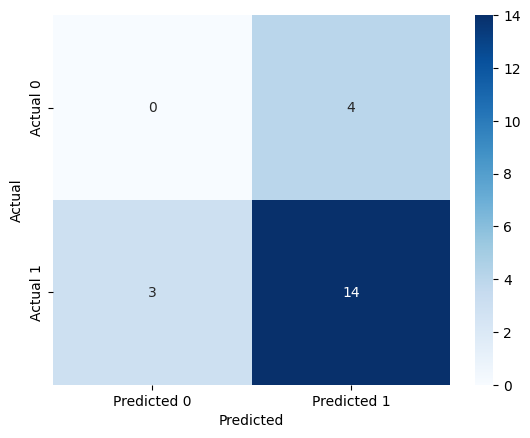

In [25]:
confusion_mat = confusion_matrix(y_val, y_pred)
df_confusion = pd.DataFrame(confusion_mat, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
sns.heatmap(df_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
knn.score(X_test_processed, y_test)

0.7727272727272727

In [26]:
y_pred = knn.predict(X_test_processed)


report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.81      0.94      0.87        18

    accuracy                           0.77        22
   macro avg       0.40      0.47      0.44        22
weighted avg       0.66      0.77      0.71        22



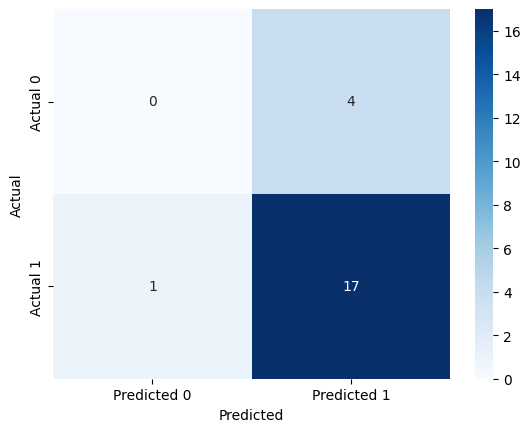

In [27]:
confusion_mat = confusion_matrix(y_test, y_pred)
df_confusion = pd.DataFrame(confusion_mat, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
sns.heatmap(df_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [92]:
class Models:

    def __init__(self,Xtrain_processed,Xtest_processed, ytrain, ytest):

        self.xtrain = Xtrain_processed
        self.xtest = Xtest_processed
        self.ytrain = ytrain
        self.ytest = ytest

  
    def randomForestModel(self,estimators=100,depth=1):
    
        for inc in range(0,depth):
            lgreg = RandomForestRegressor(n_estimators=estimators, max_depth=inc+1)
            lgreg.fit(X_train_processed,y_train)

            X_train_lg = lgreg.score(self.xtrain, y_train)
            X_test_lg = lgreg.score(self.xtest, y_test)

            pred = lgreg.predict(self.xtrain)

            print('\n************Max depth #',inc+1,'**************')
            print('\nRendimiendo datos de entremaniento:',X_train_lg, '\n')
            print('Rendimiendo datos de prueba:', X_test_lg, '\n')
            print(' R2 coeficiente de los datos de entrenamiento: ',r2_score(self.ytrain, pred),'\n')       
            print('\nMean absolute error: \n',mean_absolute_error(pred,self.ytrain))
            print('\nMean squared error: \n',mean_squared_error(pred,self.ytrain))
            print('\nResidual sum of squares: \n',mean_squared_error(pred,self.ytrain) * len(pred))
            print('\nRoot Mean Squared Error: \n',mean_squared_error(pred,self.ytrain, squared=False))
            print('Predicciones de los datos de entrenamiento: \n\n',pred)

        return pred

    def LinealRegression(self):

        reg = LinearRegression()
        reg.fit(self.xtrain,self.ytrain)

        train_score = reg.score(self.xtrain, self.ytrain)
        test_score =  reg.score(self.xtest, self.ytest)

        ypred_train = reg.predict(self.xtrain)


        r2_train = r2_score(self.ytrain, ypred_train)

        print('Rendimiendo datos de entremaniento:',train_score, '\n')
        print('Rendimiendo datos de prueba:', test_score, '\n')
        print(' R2 coeficiente de los datos de entrenamiento: ',r2_train,'\n')
        print('Predicciones de los datos de entrenamiento: \n\n',ypred_train)
        print('\nMean absolute error: \n',mean_absolute_error(ypred_train,self.ytrain))
        print('\nMean squared error: \n',mean_squared_error(ypred_train,self.ytrain))
        print('\nRoot Mean Squared Error: \n',mean_squared_error(ypred_train,self.ytrain, squared=False))


        return ypred_train
        
    def knn(self,neighbors=1):

        for inc in range(0,neighbors):
            knn =  KNeighborsRegressor(n_neighbors=inc+1)
            knn.fit(self.xtrain, y_train)
            knn_score_train = knn.score(self.xtrain, self.ytrain)
            knn_score_test = knn.score(self.xtest, self.ytest)
            
            knn_predict =  knn.predict(self.xtest)
            knn_accuracy = accuracy_score(self.ytest,knn_predict)
            print('\n************N neighbors #',inc+1,'**************')
            print('\nRendimiendo datos de entremaniento:',knn_score_train, '\n')
            print('Rendimiendo datos de prueba:', knn_score_test, '\n')
            print('Predicciones de los datos de entrenamiento: \n\n',knn_predict)
            print('Precicion de los datos : \n\n',knn_accuracy)

        return knn_predict

chooseModel = Models(X_train_processed,X_test_processed, y_train, y_test)

In [94]:
chooseModel.knn(30)


************N neighbors # 1 **************

Rendimiendo datos de entremaniento: 1.0 

Rendimiendo datos de prueba: 0.6536796536796536 

Predicciones de los datos de entrenamiento: 

 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Precicion de los datos : 

 0.95

************N neighbors # 2 **************

Rendimiendo datos de entremaniento: 0.9801587301587301 

Rendimiendo datos de prueba: 0.6536796536796536 

Predicciones de los datos de entrenamiento: 

 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Precicion de los datos : 

 0.95


ValueError: Classification metrics can't handle a mix of binary and continuous targets